# Edge and line detection

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

dataDir = 'Images_03a' # Change this, according to your images' directory path

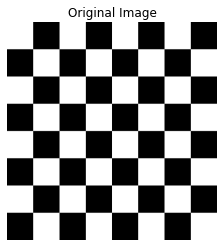

In [3]:
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'chessboard_01.jpg'), 0) # Change this, according to your image's path
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## Edge Detection

[Sobel Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

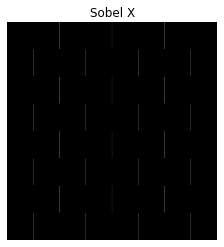

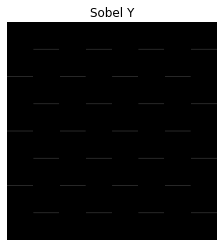

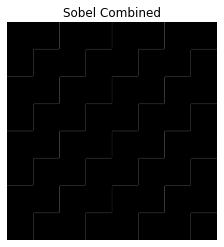

In [7]:
# Using a Sobel Filter
imgWithSobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
imgWithSobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

plt.imshow(imgWithSobelX, cmap='gray', vmin=0)
plt.title('Sobel X')
plt.axis('off')
plt.show()
plt.imshow(imgWithSobelY, cmap = 'gray', vmin=0)
plt.title('Sobel Y')
plt.axis('off')
plt.show()


# blend two images
imgWithSobel = cv2.addWeighted(imgWithSobelX, 0.5, imgWithSobelY, 0.5, 0)

plt.imshow(imgWithSobel, cmap = 'gray', vmin=0)
plt.title('Sobel Combined')
plt.axis('off')
plt.show()


[Canny Filter](https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

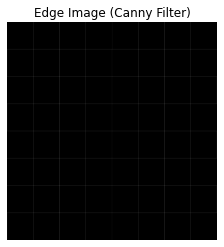

In [35]:
# Using a Canny Filter
t_lower = 0
t_upper = 300
aperature_size = 5
imgWithCannyFilter = cv2.Canny(img, t_lower, t_upper, apertureSize=aperature_size) # used the default value for the sigma of the smoothing function

plt.imshow(imgWithCannyFilter, cmap="gray")
plt.title('Edge Image (Canny Filter)')
plt.axis('off')
plt.show()

## Hough Line Transform

[Standard Hough Lines Transform](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a)

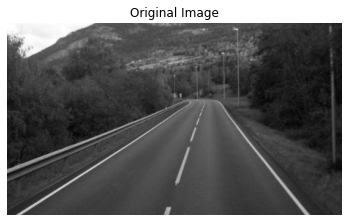

In [163]:
# Opening an image
img2 = cv2.imread(os.path.join(dataDir, 'streetLines_01.jpg'), 0) # Change this, according to your image's path
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [170]:
# First Step: detect the edges of the input image, with a Canny Filter
img2WithCanny = cv2.Canny(img2, 50, 200) # used the default value for the sigma of the smoothing function

# Copy edges to the image that will display the results in RGB (because of matplotlib)
# Remember that OpenCV operates with BGR
img2Copy = cv2.cvtColor(img2WithCanny, cv2.COLOR_GRAY2RGB)

In [171]:
# Second Step: apply the Hough transform
# Standard Hough Lines Transform
distanceResolution = 0.5
angleResolution = np.pi / 180
minNumVotes = 60 

lines = cv2.HoughLines(img2WithCanny, distanceResolution, angleResolution, minNumVotes, None, 0, 0)

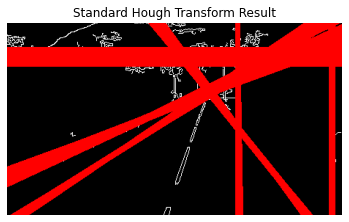

In [172]:
import math
# Drawing the lines

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img2Copy, pt1, pt2, (255,0,0), 3)

plt.imshow(img2Copy)
plt.title('Standard Hough Transform Result')
plt.axis('off')
plt.show()

[Probabilistic Hough Lines Transform](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb)

In [89]:
# Copy edges to the image that will display the results
img2CopyP = cv2.cvtColor(img2WithCanny, cv2.COLOR_GRAY2RGB)


# Second Step: apply the Hough transform
# Probabilistic Hough Lines Transform
linesP = cv2.HoughLinesP(img2WithCanny,rho=1, theta=np.pi / 180, threshold=35, minLineLength= 15, maxLineGap=9)

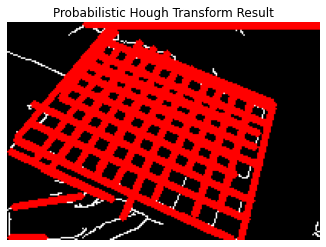

In [90]:
# Drawing the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(img2CopyP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3)

plt.imshow(img2CopyP)
plt.title('Probabilistic Hough Transform Result')
plt.axis('off')
plt.show()

## Hough Circle Transform

[Hough Circle Transform](https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)

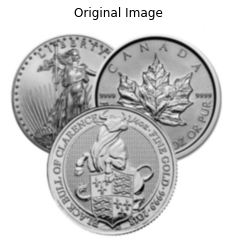

In [136]:
# coins = cv2.imread(os.path.join(dataDir, 'coins_01.jpg'), 0) # Change this, according to your image's path
coins = cv2.imread(os.path.join(dataDir, 'coins_02.jpg'), 0) 
coins = cv2.blur(coins,(3,3))

# Copy edges to the image that will display the results
coinsCopy = cv2.cvtColor(coins,cv2.COLOR_GRAY2RGB)

plt.imshow(coins, cmap="gray")
plt.title('Original Image')
plt.axis('off')
plt.show()

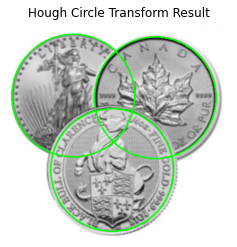

In [137]:
# Apply the Hough circle transform
detectionMethod = cv2.HOUGH_GRADIENT # corresponds to the canny filter
resolutionFlag = 1 # same resolution as the original image
minDistance = 20 # between the centers of the detected circles

#coins_1.jpg
# param1=180
# param2=90

#coins_2.jpg
# param1=500
# param2=80

# param1 and param2 are the thresholds passed to the detection method 
circles = cv2.HoughCircles(coins, detectionMethod, resolutionFlag, 
                           minDistance, param1=500, param2=80, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

# Drawing the resulting circles
for i in circles[0,:]: 
    cv2.circle(coinsCopy,(i[0],i[1]),i[2],(0,255,0),2)

plt.imshow(coinsCopy)
plt.title('Hough Circle Transform Result')
plt.axis('off')
plt.show()